In [1]:
# Turn off logging and disable tqdm this is a hidden cell on docs page
import logging
import os

logger = logging.getLogger('ibllib')
logger.setLevel(logging.CRITICAL)

os.environ["TQDM_DISABLE"] = "1"

# Loading Video Data

Extracted DLC features and motion energy from raw video data

## Relevant Alf objects
* bodyCamera
* leftCamera
* rightCamera
* licks
* ROIMotionEnergy

## Loading

In [2]:
from one.api import ONE

one = ONE()
eid = '4ecb5d24-f5cc-402c-be28-9d0f7cb14b3a'

label = 'right' # 'left', 'right' or 'body'

video_features = one.load_object(eid, f'{label}Camera', collection='alf')

/opt/hostedtoolcache/Python/3.12.9/x64/lib/python3.12/site-packages/one/util.py:543: ALFWarning: Multiple revisions: "2022-01-31", ""
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)


## More details
* [Description of camera datasets](https://docs.google.com/document/d/1OqIqqakPakHXRAwceYLwFY9gOrm8_P62XIfCTnHwstg/edit#heading=h.yjwa7dpoipz)
* [Description of DLC pipeline in IBL](https://github.com/int-brain-lab/iblvideo#readme)
* [Description of DLC QC metrics](https://int-brain-lab.github.io/iblenv/_autosummary/ibllib.qc.dlc.html)
* [IBL video white paper](https://docs.google.com/document/u/1/d/e/2PACX-1vS2777bCbDmMre-wyeDr4t0jC-0YsV_uLtYkfS3h9zTwgC7qeMk-GUqxPqcY7ylH17I1Vo1nIuuj26L/pub)

## Useful modules
* [brainbox.behavior.dlc](https://int-brain-lab.github.io/iblenv/_autosummary/brainbox.behavior.dlc.html)
* [ibllib.qc.dlc](https://int-brain-lab.github.io/iblenv/_autosummary/ibllib.qc.dlc.html)

## Exploring video data

### Example 1: Filtering dlc features by likelihood threshold

In [3]:
# Set values with likelihood below chosen threshold to NaN
from brainbox.behavior.dlc import likelihood_threshold

dlc = likelihood_threshold(video_features['dlc'], threshold=0.9)

### Example 2: Compute speed of dlc feature

In [4]:
from brainbox.behavior.dlc import get_speed

# Compute the speed of the right paw
feature = 'paw_r'
dlc_times = video_features['times']
paw_r_speed = get_speed(dlc, dlc_times, label, feature=feature)

### Example 3: Plot raster of lick times around feedback event

In [5]:
# Turn off logging, this is a hidden cell on docs page
import logging
logger = logging.getLogger('ibllib')
logger.setLevel(logging.CRITICAL)

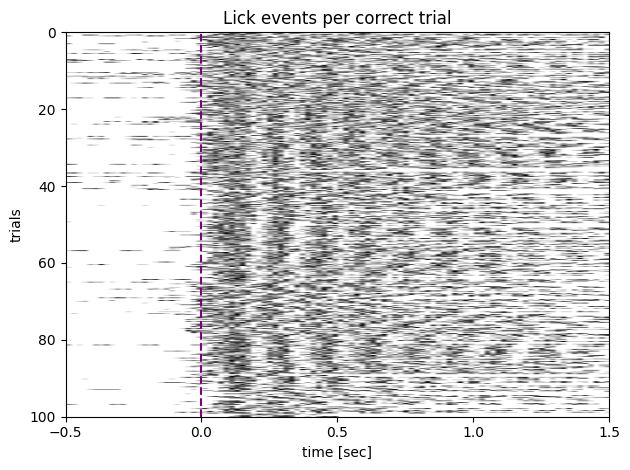

In [6]:
licks = one.load_object(eid, 'licks', collection='alf')
trials = one.load_object(eid, 'trials', collection='alf')

from brainbox.behavior.dlc import plot_lick_raster
fig = plot_lick_raster(licks['times'], trials.to_df())

## Other relevant examples
* COMING SOON